# Laboratorio 4: Mineria de Textos
### Manuel Archila 161250
### Jonathan Espinoza 20022

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [33]:
# Convertir todo a minuscula
data['text'] = data['text'].str.lower()
# Quitar caracteres especiales
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
# Quitar links
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
# Quitar emoticones
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

data['text'] = data['text'].apply(lambda x: emoji_pattern.sub(r'', x))
# Quitar signos de puntuacion
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))



Para realizar la limpieza de los textos se convirtio todo el texto a minuscula, se eliminaron caracteres especiales, links o urls, los emoticones, signos de puntuación, simbolos y pictogramas, simbología de transportes o mapas, simbolos de alquemia, formas geometricas, flechas, simbolos de ajedrez, entre otros

In [21]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stop = stopwords.words('english')
for i in range(len(data)):
    data.loc[i, 'text'] = ' '.join([word for word in data.loc[i, 'text'].split() if word not in (stop)])

data['text'] = data['text'].apply(lambda x: re.sub(r'\d+', '', x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


Se puede observar como el texto ya se encuentra limpio y en un mismo formato

In [34]:
from collections import Counter

# Separar el dataset en tweets de desastres y no desastres
disaster_tweets = data[data['target'] == 1]['text']
non_disaster_tweets = data[data['target'] == 0]['text']

# Obtener la frecuencia de palabras para tweets de desastres
disaster_words = ' '.join(disaster_tweets).split()
disaster_word_freq = Counter(disaster_words)

# Obtener las 20 palabras más comunes en tweets de desastres
disaster_common_words = disaster_word_freq.most_common(20)


In [35]:
non_disaster_words = ' '.join(non_disaster_tweets).split()
non_disaster_word_freq = Counter(non_disaster_words)

# Obtener las 20 palabras más comunes en tweets que no son desastres
non_disaster_common_words = non_disaster_word_freq.most_common(20)

In [25]:
from nltk.util import bigrams
def get_bigram_frequency(texts):
    all_bigrams = []
    for text in texts:
        tweet_bigrams = list(bigrams(text.split()))
        all_bigrams.extend(tweet_bigrams)
    return Counter(all_bigrams)

# Ejemplo de uso:
disaster_bigram_freq = get_bigram_frequency(disaster_tweets)
non_disaster_bigram_freq = get_bigram_frequency(non_disaster_tweets)


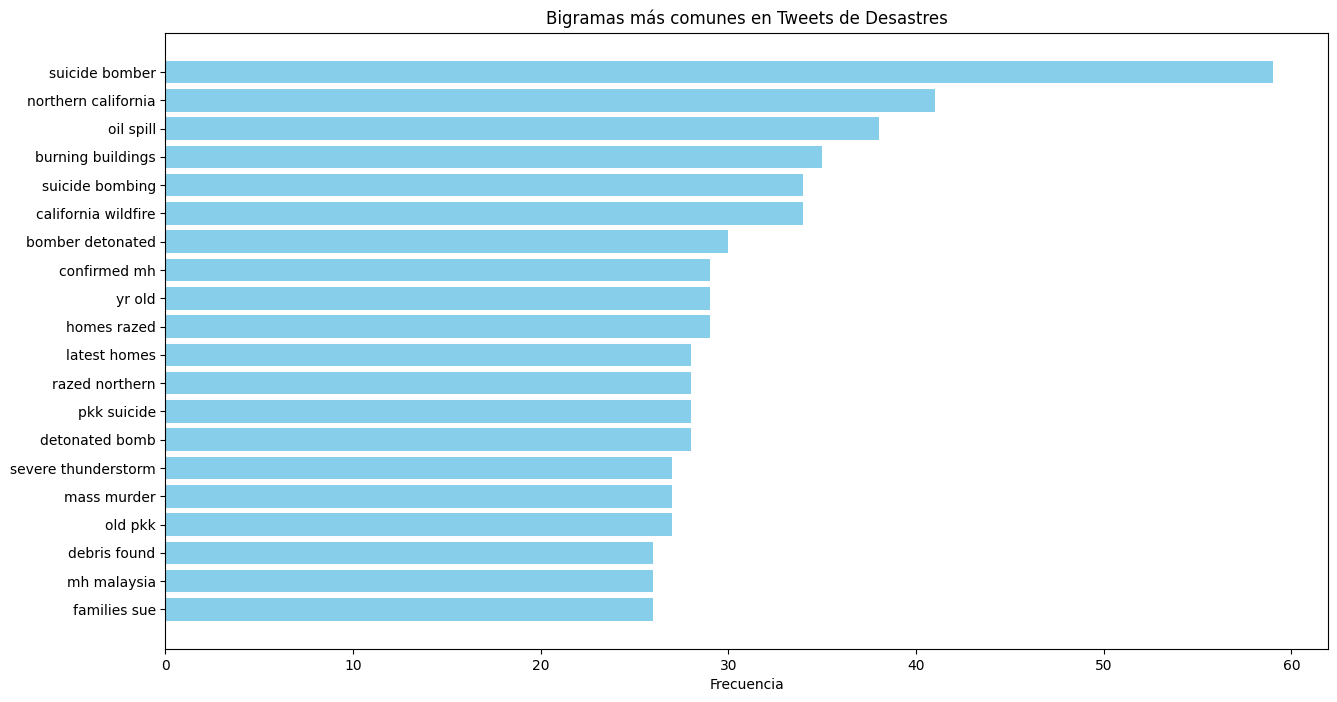

In [36]:
import matplotlib.pyplot as plt

def plot_ngrams(ngram_freq, title, n=20):
    # Obtener los n n-gramas más comunes
    common_ngrams = ngram_freq.most_common(n)
    
    # Separar n-gramas y sus frecuencias
    ngrams, counts = zip(*common_ngrams)
    ngrams = [" ".join(ng) for ng in ngrams]  # Convertir a cadena para el eje X

    # Crear el gráfico de barras
    plt.figure(figsize=(15, 8))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invertir el eje y para que el n-grama más común esté arriba
    plt.show()

# Ejemplo de uso:
plot_ngrams(disaster_bigram_freq, 'Bigramas más comunes en Tweets de Desastres')


En el caso de los Bigramas para los tweets de desastres, se puede observar como se tiene una alta aparición de "Suicede bomber". Esto podría deberse a que habrian ocurrido atentados de este tipo cerca de la fecha en la cual se obtuvieron los tweets. Por otro lado, todas los demas Bigramas cuentan con frecuencias similares destacando unicamente "Northern California", el posible lugar donde se llevo a cabo el desastre. 

In [37]:
from nltk.util import trigrams

def get_trigram_frequency(texts):
    all_trigrams = []
    for text in texts:
        tweet_trigrams = list(trigrams(text.split()))
        all_trigrams.extend(tweet_trigrams)
    return Counter(all_trigrams)

# Ejemplo de uso:
disaster_trigram_freq = get_trigram_frequency(disaster_tweets)
non_disaster_trigram_freq = get_trigram_frequency(non_disaster_tweets)


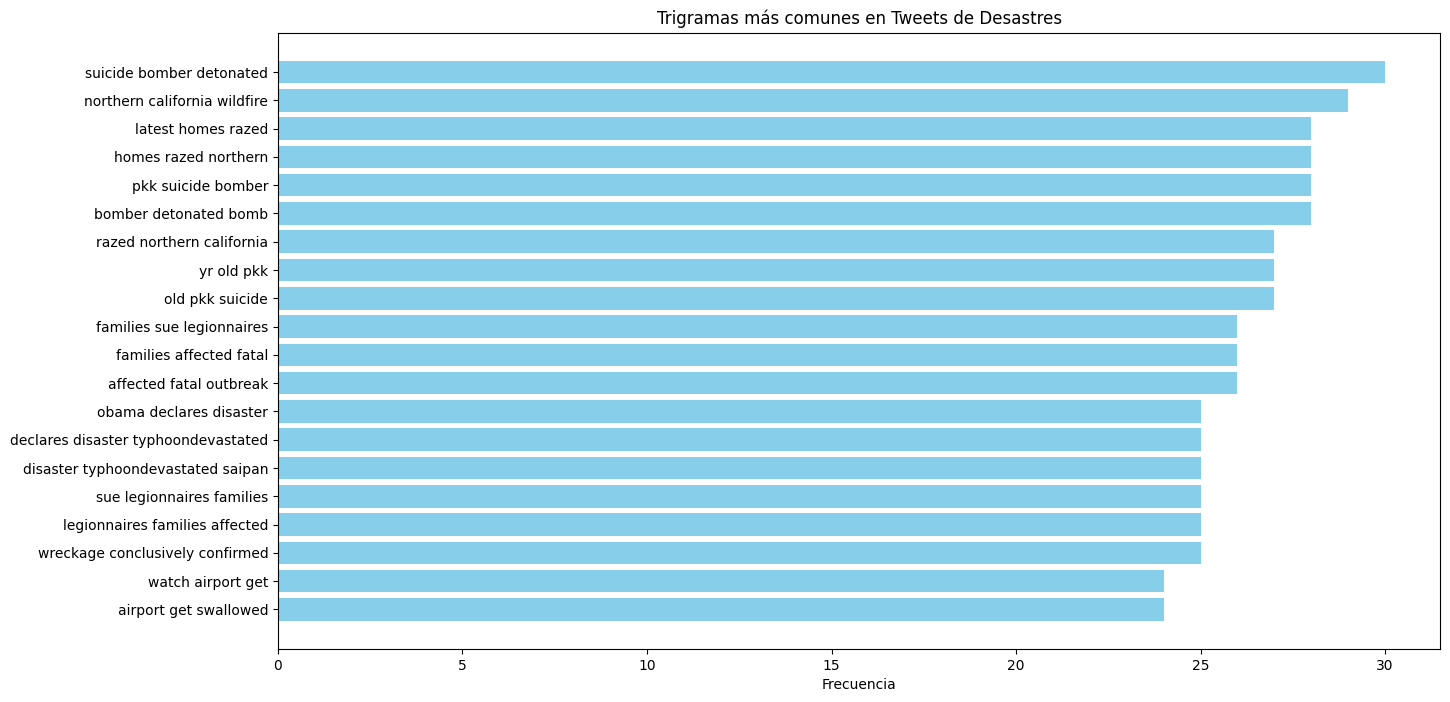

In [38]:
plot_ngrams(disaster_trigram_freq, 'Trigramas más comunes en Tweets de Desastres')


Para el caso del trigrama, en este caso, nos brinda un poco más de contexto para el Bigrama ya que podemos observar como muchos de las palabras del Bigrama vuelven a aparecer ahora en una frase.

Despues de haber realizado los bigramas y trigramas, se puede observar que si tienen sentido y son bastante utiles para el analisis de texto, ya que se puede observar que palabras se encuentran mas relacionadas entre si, y asi poder realizar un analisis mas profundo de los textos.

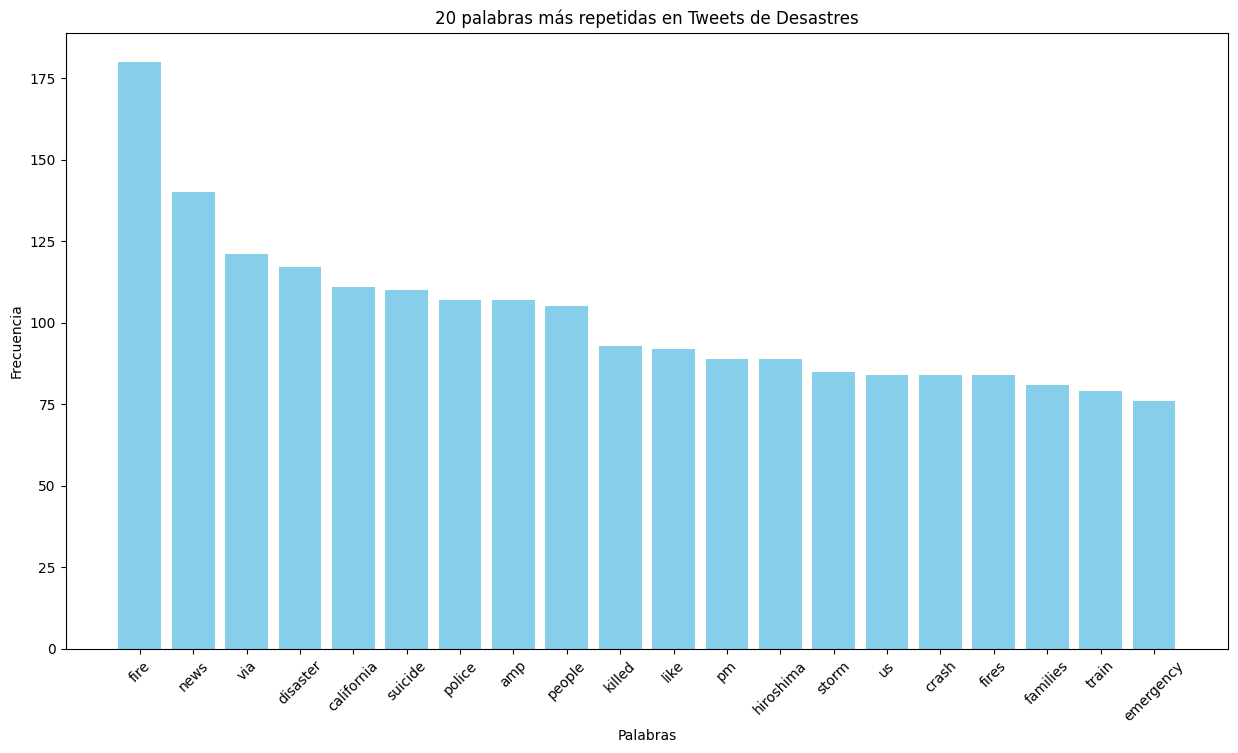

In [39]:
def plot_histogram(word_freq, title, n=20):
    common_words = word_freq.most_common(n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(15, 8))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_histogram(disaster_word_freq, '20 palabras más repetidas en Tweets de Desastres')


Tras observar los las palabras mas frecuentes se puede ver que en que son palabras alarmantes como "fire" o de tendencia como "news", al igual que otras palabras como amp.

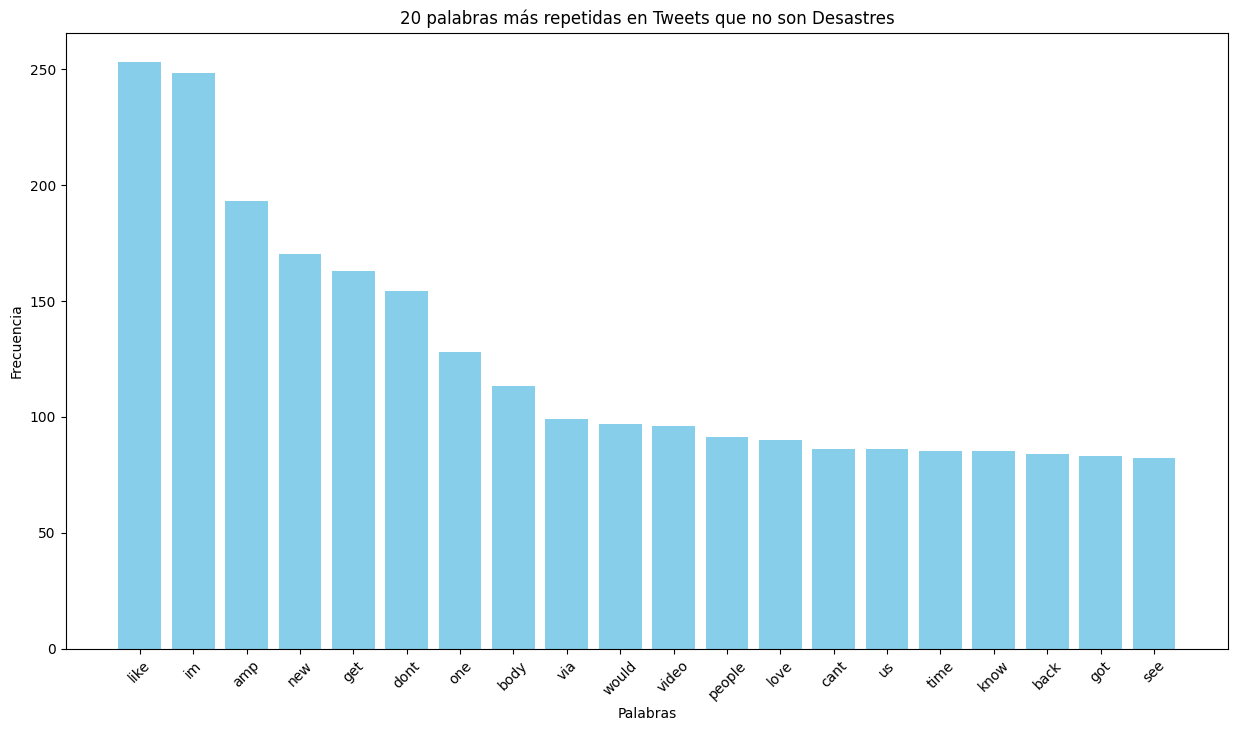

In [40]:
plot_histogram(non_disaster_word_freq, '20 palabras más repetidas en Tweets que no son Desastres')


En el caso de los tweets no relacionados con desastres, podemos observar que son palabras comunes dentro de los tweets en general o en contexto de contenido tipico de las redes sociales. Tales como "Like", "Video", "People", etc.


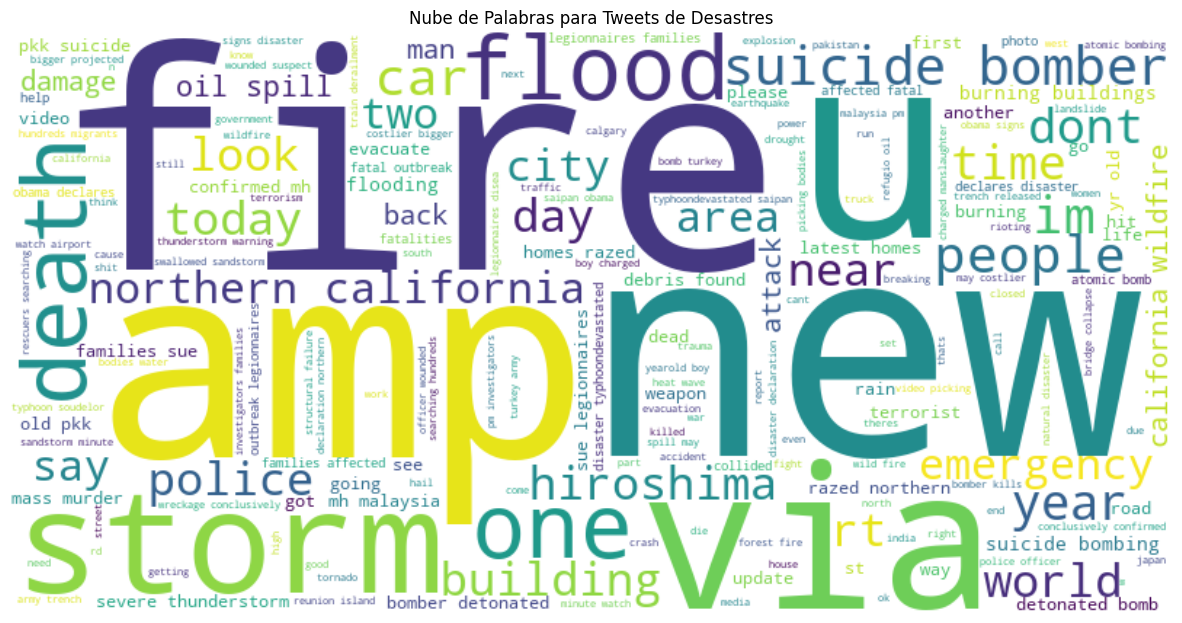

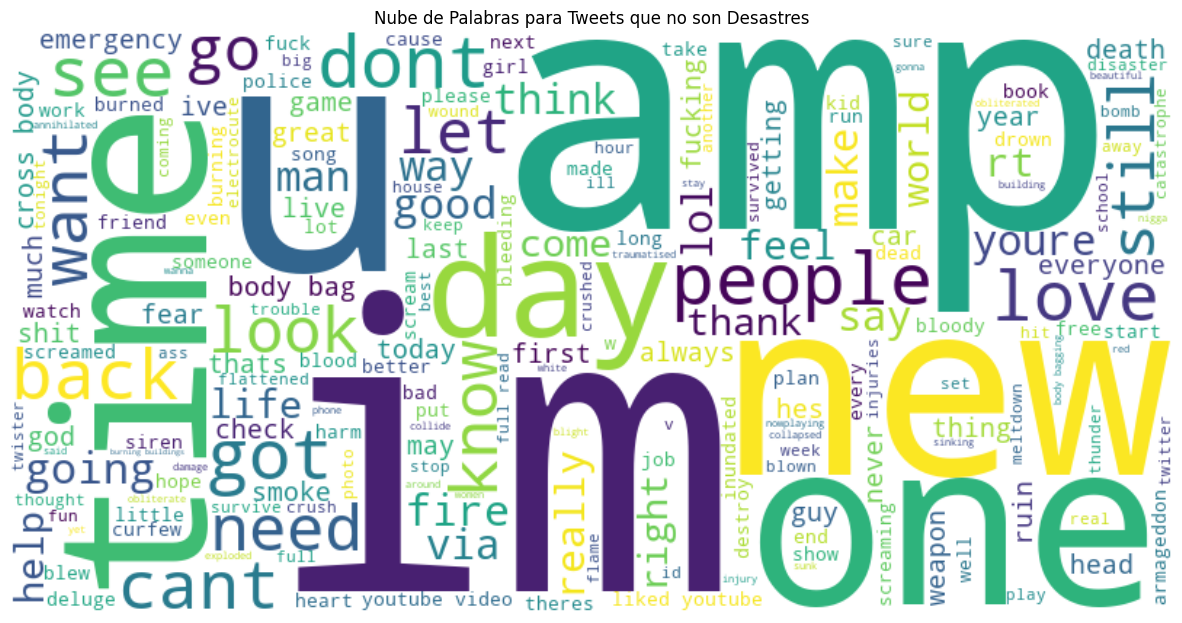

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(' '.join(disaster_tweets), 'Nube de Palabras para Tweets de Desastres')
plot_wordcloud(' '.join(non_disaster_tweets), 'Nube de Palabras para Tweets que no son Desastres')


Desastres: En la nube de palabras para los tweets de desastres, se puede observar nuevamente, como predominan las mismas palabras que encontramos en los Bigramas y trigramas. Sin embargo, tambien podemos encontrar palabras como "Fire", "New", "Amp" las cuales a simple vista no tendrian alguna congruencia con desastres. 

No desastres: Al igual que en el diagrama de desastres, encontramos nuevamente palabras que ya habiamos hallado en los Bigramas y trigramas, generalmente palabras en contexto de redes sociales. 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.3, random_state=42)

# Vectorizar los tweets usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, clf.predict(X_test_tfidf))
accuracy


0.813922942206655

Para el modelo de clasificación de tweets, se obtuvo una precisión de 81.4% en el set de prueba. Por lo que podemos indicar que es un modelo bastante acertado para la clasificación de tweets de desastres y no desastres. 

In [45]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def remove_numbers(text):
    return ''.join([i for i in text if not i.isdigit()])



In [46]:
def preprocess_tweet(tweet):
    tweet = remove_urls(tweet)
    tweet = remove_special_characters(tweet)
    tweet = remove_numbers(tweet)
    tweet = tweet.lower()
    return tweet


Función para determinar si un tweet es de desasastre o no.

In [47]:
def classify_tweet(tweet):
    processed_tweet = preprocess_tweet(tweet)
    
    tweet_tfidf = tfidf_vectorizer.transform([processed_tweet])
    
    prediction = clf.predict(tweet_tfidf)
    
    return "Desastre" if prediction[0] == 1 else "No Desastre"

sample_tweet = "There was a huge earthquake in California today."
classify_tweet(sample_tweet)


'Desastre'